In [ ]:
#

# Loading decoration for the python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from usefulPloting import Contours, ImageSegmentationShow
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'

import os
import sys
import caffe

sys.path.append("/home/naylor/Documents/Python/PhD/PhD_Fabien/FCN_Segmentation/")

/home/naylor/Python_pkg/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/naylor/Python_pkg/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/naylor/Python_pkg/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


# Setting all the files for caffe

In [2]:
#caffe.set_device(0)
caffe.set_mode_cpu()

net_root = "/home/naylor/Documents/Python/PhD/dataFCN/PretrainedWeights/finetuneFCN2"

model_def = net_root + "/deploy.prototxt"
model_weights = net_root + "/weights.pretrained.caffemodel"

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

Preprocessing image before feedforwarding the network

In [3]:
mu = np.array([104.00698793, 116.66876762, 122.67891434])

# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

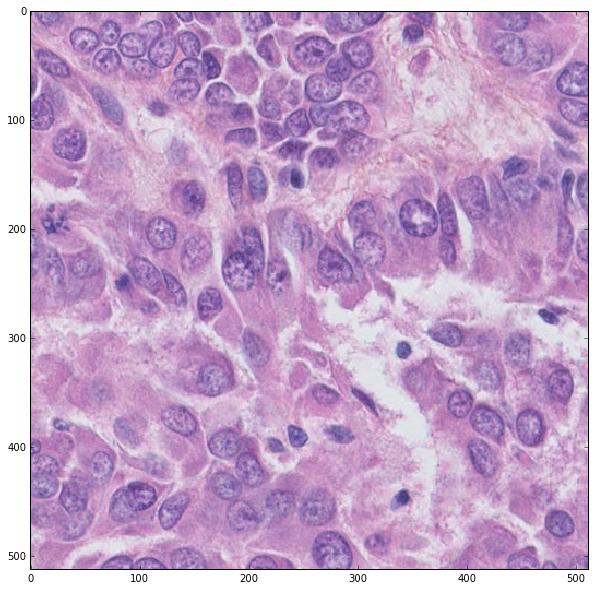

In [10]:
image_root = "/home/naylor/Documents/Python/PhD/dataFCN/RGB/"

image_ad = image_root + "/{}.png".format(30)

image = caffe.io.load_image(image_ad)
#image = caffe.io.load_image('../data/pascal-voc2010/JPEGImages/2007_000241.jpg')
transformed_image = transformer.preprocess('data', image)
plt.imshow(image)
# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = transformed_image



In [11]:
output = net.forward()

score = output['score2'][0]  # the output probability vector for the first image in the batch

print output['score2'].shape

(1, 2, 512, 512)


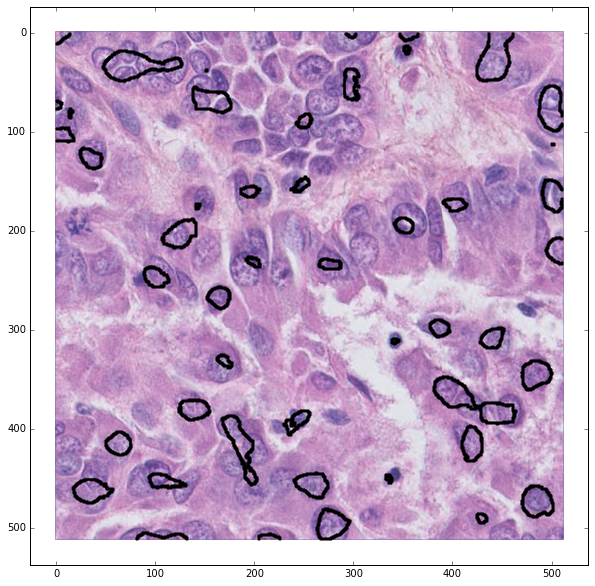

In [12]:
classed = np.argmax(score, axis=0)

names = dict()
all_labels = ["0: Background"] + ["1: Cell"]
scores = np.unique(classed)
labels = [all_labels[s] for s in scores]
num_scores = len(scores)

def rescore (c):
    """ rescore values from original score values (0-59) to values ranging from 0 to num_scores-1 """
    return np.where(scores == c)[0][0]
rescore = np.vectorize(rescore)

painted = rescore(classed)

plt.figure(figsize=(10, 10))

ImageSegmentationShow(image, painted.transpose())

In [13]:
def all_in_one(number):
    image_root = "/home/naylor/Documents/Python/PhD/dataFCN/RGB/"

    image_ad = image_root + "/{}.png".format(number)

    image = caffe.io.load_image(image_ad)
    #image = caffe.io.load_image('../data/pascal-voc2010/JPEGImages/2007_000241.jpg')
    transformed_image = transformer.preprocess('data', image)
   
    net.blobs['data'].data[...] = transformed_image
    output = net.forward()

    score = output['score2'][0]
    classed = np.argmax(score, axis=0)

    names = dict()
    all_labels = ["0: Background"] + ["1: Cell"]
    scores = np.unique(classed)
    labels = [all_labels[s] for s in scores]
    num_scores = len(scores)

    def rescore (c):
        """ rescore values from original score values (0-59) to values ranging from 0 to num_scores-1 """
        return np.where(scores == c)[0][0]
    rescore = np.vectorize(rescore)

    painted = rescore(classed)

    plt.figure(figsize=(10, 10))

    ImageSegmentationShow(image, painted.transpose())

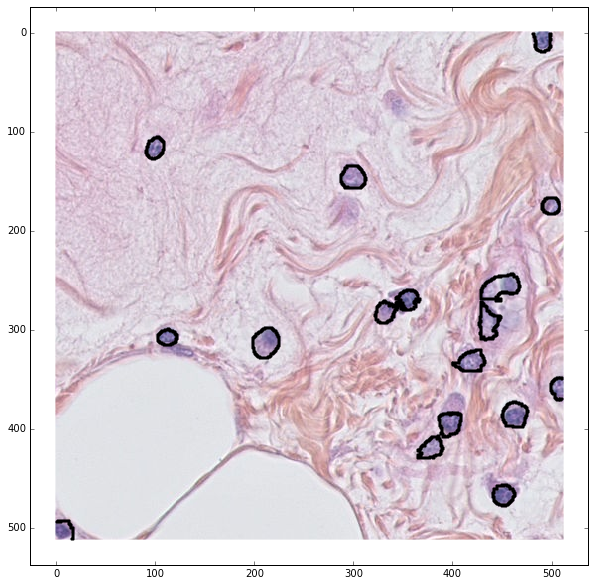

In [14]:
all_in_one(400)

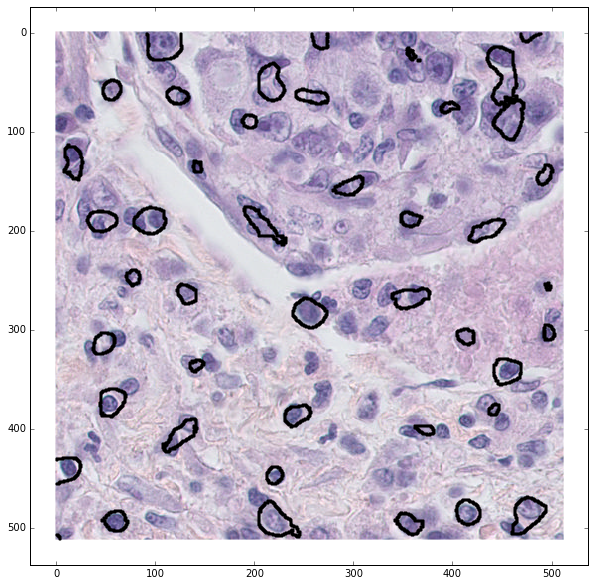

In [15]:
all_in_one(401)

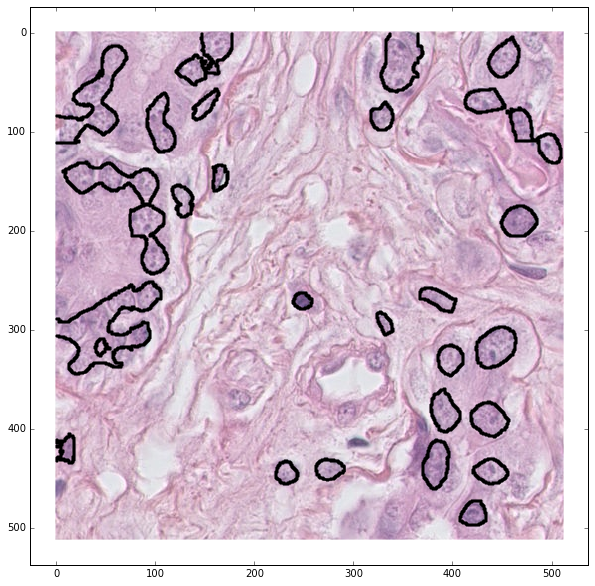

In [16]:
all_in_one(402)

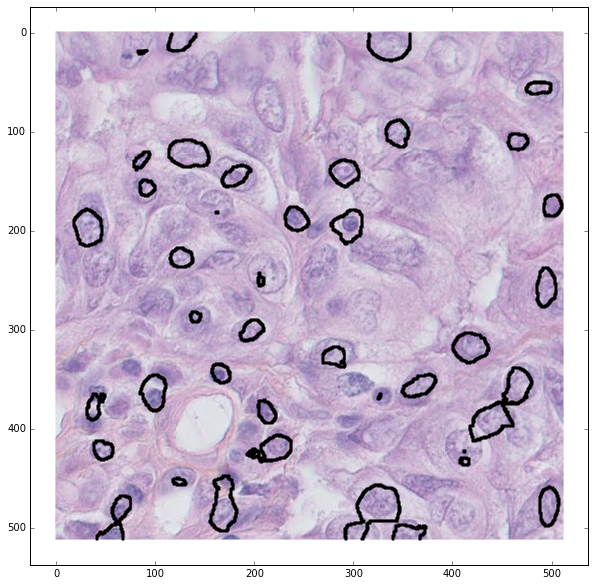

In [18]:
all_in_one(403)

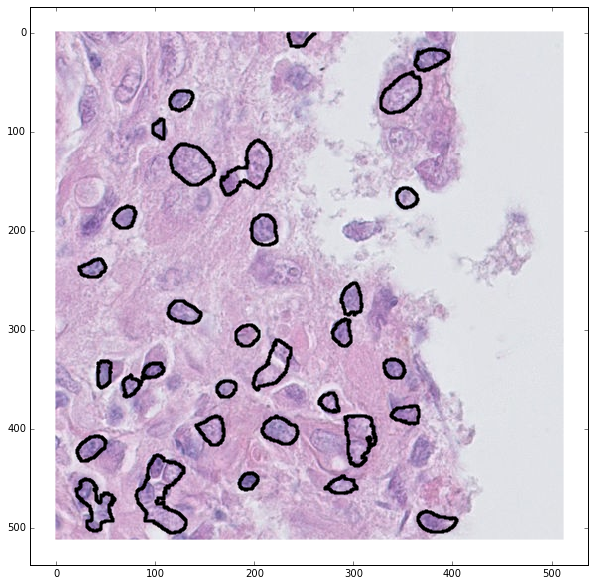

In [19]:
all_in_one(404)

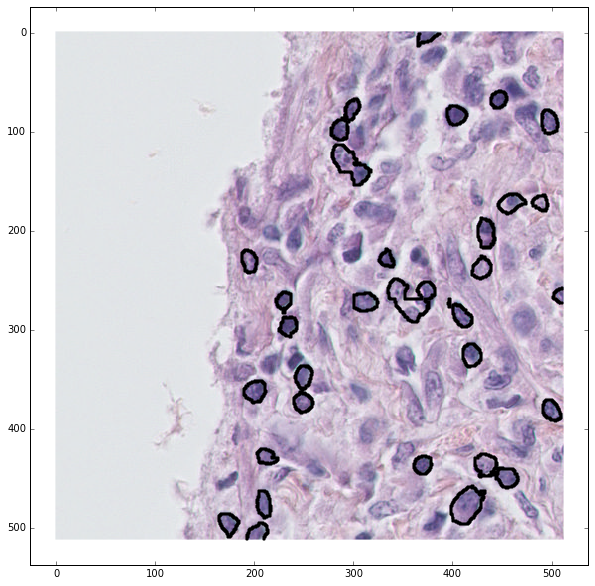

In [20]:
all_in_one(405)